# 1. Подготовка и предварительная обработка данных

In [37]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Определение преобразований для увеличения и нормализации данных
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Случайное изменение размера и обрезка изображения до 224x224
    transforms.RandomHorizontalFlip(),  # Случайное отражение изображения по горизонтали
    transforms.ToTensor(),              # Преобразование изображения в тензор PyTorch
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Нормализация значений пикселей
])

val_transforms = transforms.Compose([
    transforms.Resize(256),            # Изменение размера изображения до 256x256
    transforms.CenterCrop(224),        # Центральная обрезка изображения до 224x224
    transforms.ToTensor(),             # Преобразование изображения в тензор PyTorch
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Нормализация значений пикселей
])

# Загрузка наборов данных с применением преобразований
train_dataset = ImageFolder('data/train', transform=train_transforms)  # Загрузка и преобразование обучающего набора данных
val_dataset = ImageFolder('data/validate', transform=val_transforms)   # Загрузка и преобразование валидационного набора данных

# Создание DataLoader'ов
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Создание DataLoader для обучающего набора
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)     # Создание DataLoader для валидационного набора

# 2. Архитектура CNN и трансферное обучение

### 2.1. Разработка 3 различных архитектур

In [38]:
import torch.nn as nn
import torch.nn.functional as F

# Архитектура 1
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  # Сверточный слой с 32 фильтрами размера 3x3
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)  # Сверточный слой с 64 фильтрами размера 3x3
        self.pool = nn.MaxPool2d(2, 2)  # Пулинговый слой с окном 2x2
        self.fc1 = nn.Linear(64 * 56 * 56, 512)  # Полносвязный слой с 512 нейронами
        self.fc2 = nn.Linear(512, len(train_dataset.classes))  # Полносвязный слой с числом нейронов, равным количеству классов

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Применение свертки, активации ReLU и пулинга
        x = self.pool(F.relu(self.conv2(x)))  # Применение второго сверточного слоя, активации и пулинга
        x = torch.flatten(x, 1)  # Выпрямление тензора для подачи в полносвязный слой
        x = F.relu(self.fc1(x))  # Применение первого полносвязного слоя и активации ReLU
        x = self.fc2(x)  # Применение второго полносвязного слоя
        return x

# Архитектура 2
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  # Сверточный слой с 16 фильтрами размера 3x3
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)  # Сверточный слой с 32 фильтрами размера 3x3
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)  # Сверточный слой с 64 фильтрами размера 3x3
        self.pool = nn.MaxPool2d(2, 2)  # Пулинговый слой с окном 2x2
        self.fc1 = nn.Linear(64 * 28 * 28, 256)  # Полносвязный слой с 256 нейронами
        self.fc2 = nn.Linear(256, 128)  # Полносвязный слой с 128 нейронами
        self.fc3 = nn.Linear(128, len(train_dataset.classes))  # Полносвязный слой с числом нейронов, равным количеству классов

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Применение первого сверточного слоя, активации ReLU и пулинга
        x = self.pool(F.relu(self.conv2(x)))  # Применение второго сверточного слоя, активации и пулинга
        x = self.pool(F.relu(self.conv3(x)))  # Применение третьего сверточного слоя, активации и пулинга
        x = torch.flatten(x, 1)  # Выпрямление тензора для подачи в полносвязный слой
        x = F.relu(self.fc1(x))  # Применение первого полносвязного слоя и активации ReLU
        x = F.relu(self.fc2(x))  # Применение второго полносвязного слоя и активации ReLU
        x = self.fc3(x)  # Применение третьего полносвязного слоя
        return x

# Архитектура 3
class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  # Сверточный слой с 32 фильтрами размера 3x3
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)  # Сверточный слой с 64 фильтрами размера 3x3
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)  # Сверточный слой с 128 фильтрами размера 3x3
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)  # Сверточный слой с 256 фильтрами размера 3x3
        self.pool = nn.MaxPool2d(2, 2)  # Пулинговый слой с окном 2x2
        self.fc1 = nn.Linear(256 * 14 * 14, 1024)  # Полносвязный слой с 1024 нейронами
        self.fc2 = nn.Linear(1024, 512)  # Полносвязный слой с 512 нейронами
        self.fc3 = nn.Linear(512, len(train_dataset.classes))  # Полносвязный слой с числом нейронов, равным количеству классов

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Применение первого сверточного слоя, активации ReLU и пулинга
        x = self.pool(F.relu(self.conv2(x)))  # Применение второго сверточного слоя, активации и пулинга
        x = self.pool(F.relu(self.conv3(x)))  # Применение третьего сверточного слоя, активации и пулинга
        x = self.pool(F.relu(self.conv4(x)))  # Применение четвертого сверточного слоя, активации и пулинга
        x = torch.flatten(x, 1)  # Выпрямление тензора для подачи в полносвязный слой
        x = F.relu(self.fc1(x))  # Применение первого полносвязного слоя и активации ReLU
        x = F.relu(self.fc2(x))  # Применение второго полносвязного слоя и активации ReLU
        x = self.fc3(x)  # Применение третьего полносвязного слоя
        return x

### 2.2. Трансферное обучение

In [39]:
from torchvision import models

def create_model_transfer(model_name, num_classes):
    if model_name == "resnet":
        model = models.resnet18(pretrained=True)  # Загрузка предобученной модели ResNet-18
        for param in model.parameters():
            param.requires_grad = False  # Заморозка весов всех слоев модели
        num_ftrs = model.fc.in_features  # Получение количества входных признаков для полносвязного слоя
        model.fc = nn.Linear(num_ftrs, num_classes)  # Замена полносвязного слоя на новый с нужным количеством выходов
    return model

# Создание трех экземпляров модели с замененным полносвязным слоем
model_1_transfer = create_model_transfer("resnet", len(train_dataset.classes))
model_2_transfer = create_model_transfer("resnet", len(train_dataset.classes))
model_3_transfer = create_model_transfer("resnet", len(train_dataset.classes))

# 3. Обучение CNN

### 3.1. Обучение с функциями потерь, оптимизаторами и регуляризацией

In [40]:
import torch
import torch.optim as optim

def train_model(model, train_loader, val_loader, num_epochs=10):
    criterion = nn.CrossEntropyLoss()  # Определение функции потерь (кросс-энтропия)
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Определение оптимизатора (Adam) с learning rate 0.001
    
    # Инициализация списков для отслеживания потерь и точности
    train_losses, val_losses, val_accuracies = [], [], []
    
    for epoch in range(num_epochs):  # Цикл по эпохам
        model.train()  # Переключение модели в режим обучения
        running_loss = 0.0
        for inputs, labels in train_loader:  # Цикл по батчам в обучающем наборе данных
            inputs, labels = inputs.to(device), labels.to(device)  # Перемещение данных на устройство (GPU или CPU)
            optimizer.zero_grad()  # Обнуление градиентов
            outputs = model(inputs)  # Прямой проход
            loss = criterion(outputs, labels)  # Вычисление потерь
            loss.backward()  # Обратный проход (вычисление градиентов)
            optimizer.step()  # Шаг оптимизации (обновление весов)
            running_loss += loss.item()  # Накопление потерь
        
        # Запись среднего значения потерь на обучении
        train_losses.append(running_loss / len(train_loader))
        
        # Фаза валидации
        model.eval()  # Переключение модели в режим оценки
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():  # Отключение вычисления градиентов
            for inputs, labels in val_loader:  # Цикл по батчам в валидационном наборе данных
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        # Запись среднего значения потерь и точности на валидации
        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(100 * correct / total)
        
        # Вывод информации о ходе обучения
        print(f'Epoch {epoch+1}:')
        print(f'Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.2f}%')
    
    # Возвращение модели и записанных метрик
    return model, train_losses, val_losses, val_accuracies

### 3.2. Предотвращение переобучения и недообучения

Переобучение и недообучение можно предотвратить, регулярно проверяя производительность модели на валидационном наборе данных и применяя методы, такие как Dropout и ранняя остановка.

# 4. Настройка гиперпараметров

### 4.1. Как настраивать гиперпараметры

Настройка гиперпараметров может быть выполнена через ручную настройку, сеточный поиск (Grid Search) или случайный поиск (Random Search).

### 4.2. Сравнение результатов обучения

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch

def plot_results(train_losses, val_losses, val_accuracies):
    epochs = range(1, len(train_losses) + 1)  # Получение списка эпох
    plt.figure(figsize=(12, 4))  # Установка размера фигуры
    
    plt.subplot(1, 2, 1)  # Первый подграфик для потерь
    plt.plot(epochs, train_losses, 'bo-', label='Training loss')  # График потерь на обучении
    plt.plot(epochs, val_losses, 'ro-', label='Validation loss')  # График потерь на валидации
    plt.title('Training and validation loss')  # Заголовок графика
    plt.xlabel('Epochs')  # Подпись оси X
    plt.ylabel('Loss')  # Подпись оси Y
    plt.legend()  # Отображение легенды
    
    plt.subplot(1, 2, 2)  # Второй подграфик для точности
    plt.plot(epochs, val_accuracies, 'go-', label='Validation accuracy')  # График точности на валидации
    plt.title('Validation accuracy')  # Заголовок графика
    plt.xlabel('Epochs')  # Подпись оси X
    plt.ylabel('Accuracy')  # Подпись оси Y
    plt.legend()  # Отображение легенды
    
    plt.tight_layout()  # Автоматическое выравнивание подграфиков
    plt.show()  # Отображение графиков

Epoch 1:
Train Loss: 1.3907, Val Loss: 1.5491, Val Acc: 46.67%
Epoch 2:
Train Loss: 1.2403, Val Loss: 1.3953, Val Acc: 40.00%
Epoch 3:
Train Loss: 1.0371, Val Loss: 1.2744, Val Acc: 50.00%
Epoch 4:
Train Loss: 0.9668, Val Loss: 1.1789, Val Acc: 56.67%
Epoch 5:
Train Loss: 0.9042, Val Loss: 1.1311, Val Acc: 60.00%
Epoch 6:
Train Loss: 0.8796, Val Loss: 1.0796, Val Acc: 60.00%
Epoch 7:
Train Loss: 0.8406, Val Loss: 1.0238, Val Acc: 63.33%
Epoch 8:
Train Loss: 0.7976, Val Loss: 1.0856, Val Acc: 60.00%
Epoch 9:
Train Loss: 0.7778, Val Loss: 0.9547, Val Acc: 66.67%
Epoch 10:
Train Loss: 0.7237, Val Loss: 0.9838, Val Acc: 56.67%
Epoch 11:
Train Loss: 0.7037, Val Loss: 0.9606, Val Acc: 60.00%
Epoch 12:
Train Loss: 0.7208, Val Loss: 0.9511, Val Acc: 66.67%
Epoch 13:
Train Loss: 0.7195, Val Loss: 0.9626, Val Acc: 60.00%
Epoch 14:
Train Loss: 0.7004, Val Loss: 0.9254, Val Acc: 56.67%
Epoch 15:
Train Loss: 0.6768, Val Loss: 0.9171, Val Acc: 63.33%


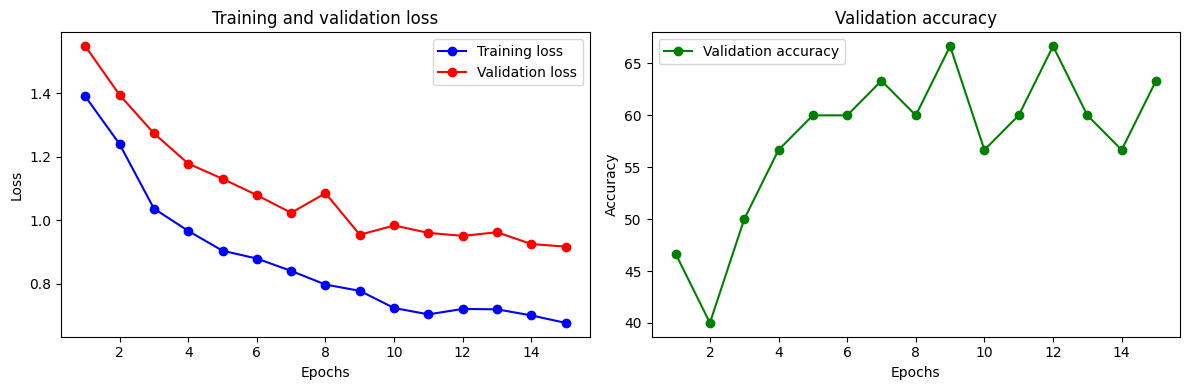

Epoch 1:
Train Loss: 1.4386, Val Loss: 1.6975, Val Acc: 33.33%
Epoch 2:
Train Loss: 1.2806, Val Loss: 1.3549, Val Acc: 36.67%
Epoch 3:
Train Loss: 1.1454, Val Loss: 1.2584, Val Acc: 50.00%
Epoch 4:
Train Loss: 1.0420, Val Loss: 1.2143, Val Acc: 53.33%
Epoch 5:
Train Loss: 0.9931, Val Loss: 1.1087, Val Acc: 50.00%
Epoch 6:
Train Loss: 0.9143, Val Loss: 1.0999, Val Acc: 50.00%
Epoch 7:
Train Loss: 0.8571, Val Loss: 1.0045, Val Acc: 70.00%
Epoch 8:
Train Loss: 0.8280, Val Loss: 1.0869, Val Acc: 63.33%
Epoch 9:
Train Loss: 0.7697, Val Loss: 0.9719, Val Acc: 60.00%
Epoch 10:
Train Loss: 0.7417, Val Loss: 0.9702, Val Acc: 63.33%
Epoch 11:
Train Loss: 0.7675, Val Loss: 0.9947, Val Acc: 66.67%
Epoch 12:
Train Loss: 0.7381, Val Loss: 0.9198, Val Acc: 63.33%
Epoch 13:
Train Loss: 0.7319, Val Loss: 0.9683, Val Acc: 70.00%
Epoch 14:
Train Loss: 0.7129, Val Loss: 0.8996, Val Acc: 63.33%
Epoch 15:
Train Loss: 0.7006, Val Loss: 0.9007, Val Acc: 66.67%


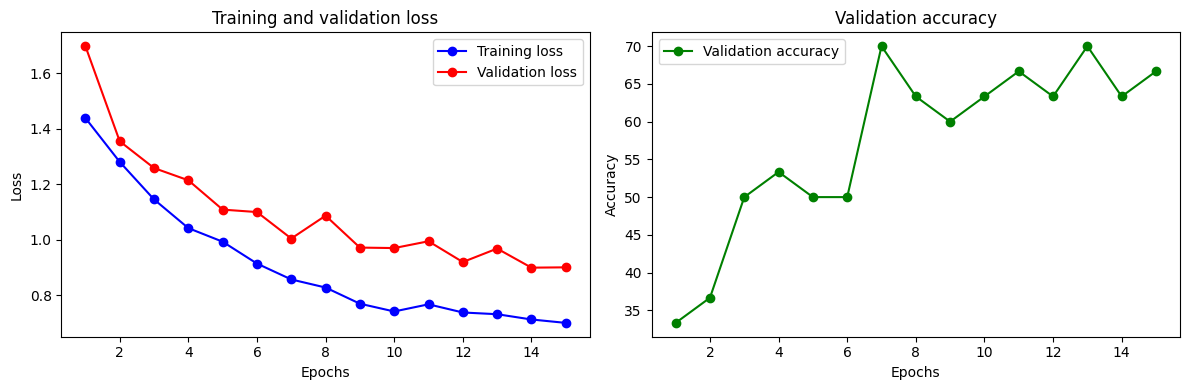

Epoch 1:
Train Loss: 1.3936, Val Loss: 1.7257, Val Acc: 46.67%
Epoch 2:
Train Loss: 1.2313, Val Loss: 1.4493, Val Acc: 46.67%
Epoch 3:
Train Loss: 1.1120, Val Loss: 1.3559, Val Acc: 40.00%
Epoch 4:
Train Loss: 0.9777, Val Loss: 1.2076, Val Acc: 53.33%
Epoch 5:
Train Loss: 0.9201, Val Loss: 1.1329, Val Acc: 50.00%
Epoch 6:
Train Loss: 0.9051, Val Loss: 1.0571, Val Acc: 60.00%
Epoch 7:
Train Loss: 0.8633, Val Loss: 1.1136, Val Acc: 53.33%
Epoch 8:
Train Loss: 0.7890, Val Loss: 0.9985, Val Acc: 66.67%
Epoch 9:
Train Loss: 0.7678, Val Loss: 0.9930, Val Acc: 63.33%
Epoch 10:
Train Loss: 0.7967, Val Loss: 1.0030, Val Acc: 60.00%
Epoch 11:
Train Loss: 0.7626, Val Loss: 0.9963, Val Acc: 60.00%
Epoch 12:
Train Loss: 0.7343, Val Loss: 0.9311, Val Acc: 66.67%
Epoch 13:
Train Loss: 0.6989, Val Loss: 0.9538, Val Acc: 66.67%
Epoch 14:
Train Loss: 0.6394, Val Loss: 0.8948, Val Acc: 70.00%
Epoch 15:
Train Loss: 0.7205, Val Loss: 0.8706, Val Acc: 73.33%


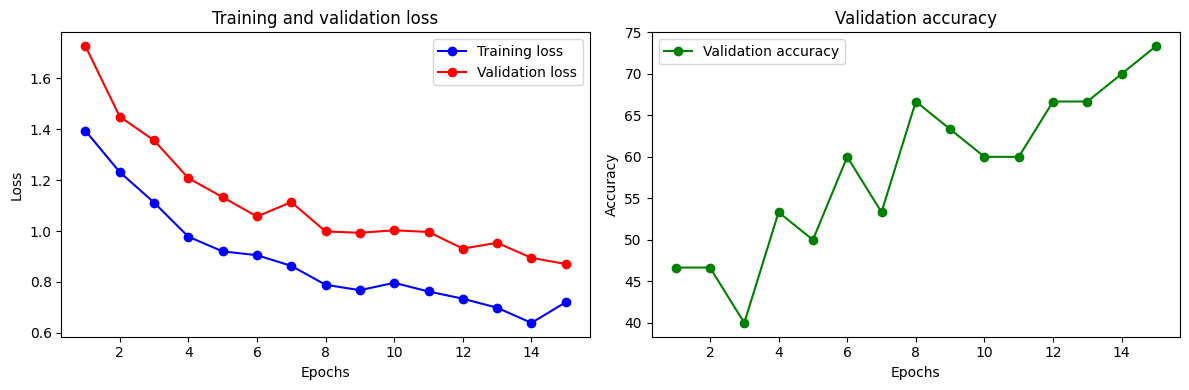

In [42]:
# Определение устройства: использование GPU, если доступно, иначе использование CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Перемещение модели на устройство
model_1_transfer.to(device)
model_1_transfer, train_losses, val_losses, val_accuracies = train_model(model_1_transfer, train_loader, val_loader, num_epochs=15) # Обучение модели и получение результатов
plot_results(train_losses, val_losses, val_accuracies) # Визуализация результатов

model_2_transfer.to(device)
model_2_transfer, train_losses, val_losses, val_accuracies = train_model(model_2_transfer, train_loader, val_loader, num_epochs=15)
plot_results(train_losses, val_losses, val_accuracies)

model_3_transfer.to(device)
model_3_transfer, train_losses, val_losses, val_accuracies = train_model(model_3_transfer, train_loader, val_loader, num_epochs=15)
plot_results(train_losses, val_losses, val_accuracies)